<a href="https://colab.research.google.com/github/fenzhantw/DLforeveryone/blob/main/DeepLearning_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단순 선형회귀

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
#기본 numpy로 경사하강법 구현

X = np.array([1,2,3])
Y = np.array([1,2,3,])

def cost_func(W,X,Y):
  c = 0
  for i in range(len(X)):
    c += ( W * X[i] -Y[i])**2
  return c / len(X)

for feed_W in np.linspace(-3,5,num=15):
  curr_cost = cost_func(feed_W,X,Y)
  print("{:6.3f} | {:10.5f}".format(feed_W,curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


In [ ]:
## TensorFlow로 구현하기

X = np.array([1,2,3])
Y = np.array([1,2,3,])

def cost_fun(W,X,Y):
  hypothesis = X*W
  return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3,5,num=15)
cost_values =[]

for feed_W in W_values:
  curr_cost = cost_fun(feed_W,X,Y)
  cost_values.append(curr_cost)
  print("{:6.3f}|{:10.5f}".format(feed_W,curr_cost))

-3.000|  74.66667
-2.429|  54.85714
-1.857|  38.09524
-1.286|  24.38095
-0.714|  13.71429
-0.143|   6.09524
 0.429|   1.52381
 1.000|   0.00000
 1.571|   1.52381
 2.143|   6.09524
 2.714|  13.71429
 3.286|  24.38095
 3.857|  38.09524
 4.429|  54.85714
 5.000|  74.66667


In [ ]:
alpha = 0.01
gradient = tf.reduce_mean(tf.multiply(tf.multiply(W,X) - Y,X))
descent = W - tf.multiply(alpha,gradient)
W.assign(descent)

In [ ]:
#재현성을 위해 랜덤 시드 설정
seed=0
tf.random.set_seed(seed)

x_data =[1.,2.,3.,4.]
y_data = [1.,2.,3.,4]

W= tf.Variable(tf.random.normal([1],-100.,100.))

for step in range(300):
  hypothesis = W*X
  cost = tf.reduce_mean(tf.square(hypothesis - Y))

  alpha = 0.01
  gradient = tf.reduce_mean(tf.multiply(tf.multiply(W,X) - Y,X))
  descent = W - tf.multiply(alpha,gradient)
  W.assign(descent)

  if step %10 == 0:
    print('{:5} | {:10.4f} | {:10.6f}'.format(step,cost.numpy(),W.numpy()[0]))


    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046


# 다변수 회귀

In [ ]:
##다변량 선형회귀
# 변수가 많아지면, x1w1+x2w2+x3w3....이렇게 w값이 엄청 많아지게 되는데, 일일이 써주기에 매우 불편하게 된다.
# 따라서 가중치의 값이 굉장히 많을때는 Matrix를 활용하여 이를 풀어낸다.
# Dot Product를 이용하여 XW를 이용하여 H(X)를 간편하게 표현
# TensorFlow에서는 XW로 표현한다. 
# 이렇게 매트릭스를 활용한다면, 간단하게 표현할 수 있기 때문에 사용
# 매트릭스는 앞의 컬럼과 뒤의 로우수가 일치해야 한다. 컬럼과 로우수가 일치하면, 앞의 로우가 몇개에 관계없이 동일한 표현식을 사용할 수 있음 XW로


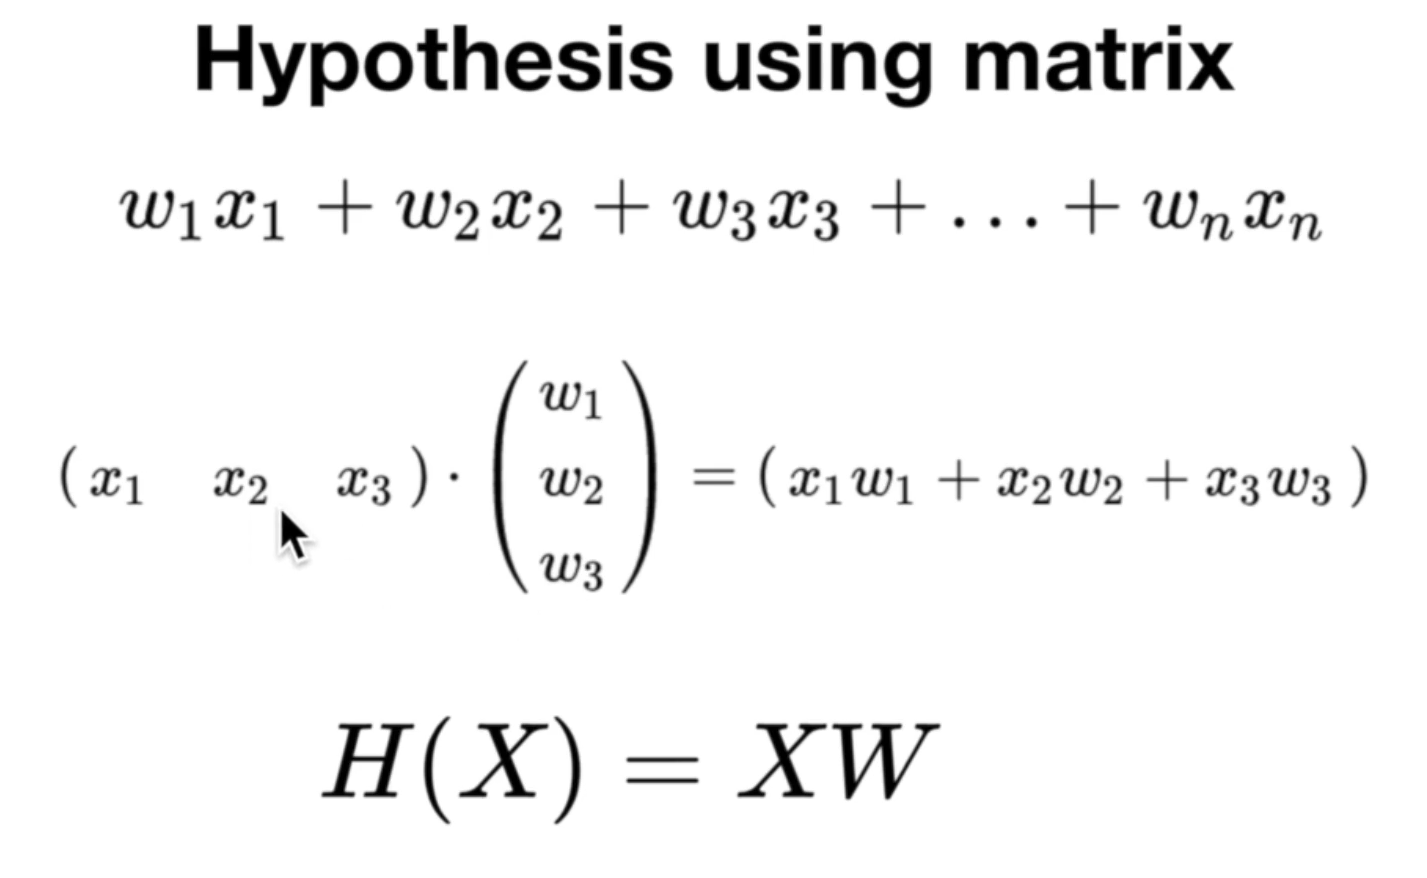

In [ ]:
# data and Lable

x1 = [73.,93.,89.,96.,73.]
x2 = [80.,88.,91.,98.,66.]
x3 = [75.,93.,90.,100.,70.]
Y = [152.,185.,180.,196.,142.]

w1 = tf.Variable(tf.random.normal([1]))
w2 = tf.Variable(tf.random.normal([1]))
w3 = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))


learning_rate = 0.000001

for i in range(1000+1):
  with tf.GradientTape() as tape:
    hypothesis = w1 * x1 + w2 * x2 + w3 * x3 + b
    cost = tf.reduce_mean(tf.square(hypothesis-Y))

  w1_grad,w2_grad,w3_grad,b_grad =tape.gradient(cost,[w1,w2,w3,b])

  w1.assign_sub(learning_rate*w1_grad)
  w2.assign_sub(learning_rate*w2_grad)
  w3.assign_sub(learning_rate*w3_grad)
  b.assign_sub(learning_rate*b_grad)

  if i % 50 ==0:
    print("{:5} | {:12.4f}".format(i,cost.numpy()))

    0 |  135153.3594
   50 |    1550.8137
  100 |      68.2184
  150 |      51.6328
  200 |      51.3142
  250 |      51.1767
  300 |      51.0413
  350 |      50.9064
  400 |      50.7718
  450 |      50.6376
  500 |      50.5038
  550 |      50.3705
  600 |      50.2376
  650 |      50.1049
  700 |      49.9725
  750 |      49.8404
  800 |      49.7088
  850 |      49.5777
  900 |      49.4468
  950 |      49.3162
 1000 |      49.1860


In [ ]:
# 매트릭스를 사용하여 표현하기
# 매트릭스를 사용하지 않으면, 변수를 3번 다 써줘야 하지만, 매트릭스로 표현하면 코드가 한줄로 매우 간단해진다.

data = np.array([
      [73.,80.,75.,152.],
      [93.,88.,93.,185.],
      [89.,91.,90.,180.],
      [96.,98.,100.,196.],
      [73.,66.,70.,142.]
],dtype=np.float32)

#array slice data
X = data[:,:-1]
y = data[:,[-1]]

W = tf.Variable(tf.random.normal([3,1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001

def predict(X):
  return tf.matmul(X,W) + b

#1번 for문이 도는 것을 1번의 에포크라고 한다 .
n_epochs = 2000

for i in range(n_epochs+1):
  with tf.GradientTape() as tape:
    cost = tf.reduce_mean((tf.square(predict(X)-y)))

  W_grad,b_grad = tape.gradient(cost,[W,b])

  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 100 == 0:
    print("{:5} | {:12.4f}".format(i,cost.numpy()))


    0 |   68262.3594
  100 |       8.5680
  200 |       0.1644
  300 |       0.1633
  400 |       0.1632
  500 |       0.1631
  600 |       0.1631
  700 |       0.1630
  800 |       0.1629
  900 |       0.1629
 1000 |       0.1628
 1100 |       0.1627
 1200 |       0.1627
 1300 |       0.1626
 1400 |       0.1626
 1500 |       0.1625
 1600 |       0.1624
 1700 |       0.1624
 1800 |       0.1623
 1900 |       0.1622
 2000 |       0.1622


# Logistic Regression

In [ ]:
 x_train = [[1.,2.],[2.,3.],[3.,1.],[4.,3.],[5.,3.],[6.,2.]]
 y_train = [[0.],[0.],[0.],[1.],[1.],[1.]]

 x_test = [[5.,2.]]
 y_test = [[1.]]

 x1 = [x[0] for x in x_train]
 x2 = [x[1] for x in x_train]


In [ ]:
# 데이터셋 정의
dataset  = tf.data.Dataset.from_tensor_slices((x_train,y_train))

# W값,b값 초기화
W = tf.Variable(tf.zeros([2,1]),name='weight')
b = tf.Variable(tf.zeros([1]),name='b_grad')

#시그모이드 함수 정의
def logistic_regression(features):
  hypothesis = tf.divide(1.,1.+tf.exp(-tf.matmul(features,W)+b))
  return hypothesis

#손실함수 정의, 왜 reduce_mean을 해주는 걸까?
def loss_fn(hypothesis,labels):
  cost = -tf.reduce_mean(labels*tf.math.log(hypothesis)+(1-labels)*tf.math.log(1-hypothesis))
  return cost


optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)


def accuracy_fn(hypothesis,labels):
  predicted = tf.cast(hypothesis >0.5,dtype=tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,labels),dtype=tf.int32))
  return accuracy

#미분값 반환
def grad(features,labels):
  with tf.GradientTape() as tape:
    hypothesis = logistic_regression(features)
    loss_value = loss_fn(hypothesis,labels)
  return tape.gradient(loss_value,[W,b])

EPOCHS = 1001
for step in range(EPOCHS):
  for features, labels in iter(dataset.batch(len(x_train))):
    hypothesis = logistic_regression(features)
    grads = grad(features,labels)
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
    if step % 100 ==0:
      print("Iter: {},Loss: {:.4f}".format(step,loss_fn(hypothesis,labels)))

Iter: 0,Loss: 0.6931
Iter: 100,Loss: 0.5781
Iter: 200,Loss: 0.5352
Iter: 300,Loss: 0.5056
Iter: 400,Loss: 0.4840
Iter: 500,Loss: 0.4673
Iter: 600,Loss: 0.4537
Iter: 700,Loss: 0.4421
Iter: 800,Loss: 0.4320
Iter: 900,Loss: 0.4229
Iter: 1000,Loss: 0.4145


In [ ]:
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Test Result = {}".format(tf.cast(logistic_regression(x_test)>0.5,dtype=tf.int32)))
print("Testset Accuracy:{:.4f}".format(test_acc))

Test Result = [[1]]
Testset Accuracy:1.0000


In [ ]:
 xy = np.loadtxt('/content/data-04-zoo.csv',delimiter=',',dtype=np.float32)
 x_data = xy[:,0:-1]
 y_data = xy[:,[-1]]

In [ ]:
nb_classes = 7

In [ ]:
y_data = tf.dtypes.cast(y_data, tf.int32)
Y_one_hot = tf.one_hot(list(y_data),nb_classes)

In [ ]:
y_data

In [ ]:
Y_one_hot

In [ ]:
Y_one_hot = tf.reshape(Y_one_hot,[-1,nb_classes])

In [ ]:
print(Y_one_hot.shape)

(101, 7)


In [ ]:
Y_one_hot

In [ ]:
W = tf.Variable(tf.random.normal([16,nb_classes]),name='weight')
b = tf.Variable(tf.random.normal([nb_classes]),name='bias')
variables = [W,b]

def logit_fn(X):
  return tf.matmul(X,W) + b

def hypothesis(X):
  return tf.nn.softmax(logit_fn(X))

def cost_fn(X,Y):
  logits = logit_fn(X)
  cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y)
  cost = tf.reduce_mean(cost_i)
  return cost

def grad_fn(X,Y):
  with tf.GradientTape() as tape:
    loss = cost_fn(X,Y)
    grads = tape.gradient(loss,variables)
    return grad

def prediction(X,Y):
  pred.tf.argmax(hypothesis(X),1)
  correct_prediction = tf.equal(pred,tf.argmax(Y,1))

# Learning rate
- Learning rate is a hyper-parameter that controls how much we are adjusting the weights with respect the loss gradient
- 러닝 레이트가 너무 크거나, 너무 작으면 cost값이 제대로 줄지 않게 학습이 될 수 있음.

- 따라서 러닝 레이트를 적절히 조절하는 방법(learning rate decay)이 고안되었는데,Exponential decay(지속적으로 줄이는 방법)을 통해 learning rate를 조절하여 loss가 최소화 되는 모델을 학습하도록 유도함.
- exponentail decay 말고도 다양한 방법이 있음

#Overfitting
- get more training data : more data will actually make a difference (helps to fix high variance)
- variance: 변화량이 많음
- bias : 편향됨
- smaller set of features - dimensionality reduction(PCA) : fixes high variance
- add additional features - hypothesis is too simple, make hypothesis more specific(fixed high bias)


- Regularization(Add term to loss)
:정규화 실제 Cost값에다가 term(lambda 식) 과 같은 값을 주어서 overfitting을 특정값에 weight가 큰 것을 잘 방지하는 방법
